<h2 align="center"> <font color='gray'>dtreeviz</font></h2>
<h3 align="center"> <font color='gray'>Regressor Single Instance</font></h3>

<div class="alert alert-block alert-success">  
<b>Description:</b> The Python-based dtreeviz library is a visualization tool for decision trees. It allows users to create interactive visualizations of decision trees, which can be used to gain insights into the structure and behavior of these models. Additionally, dtreeviz provides a range of features that enable users to customize their visualizations, making it a powerful tool for data exploration and analysis.
    
The dtreeviz library in Python is compatible with several decision tree libraries, including scikit-learn, XGBoost, TensorFlow.
    
https://explained.ai/decision-tree-viz/    

</div>

<div class="alert alert-block alert-success">  
<b>Description:</b> There are several functions for visualization of single prediction with the given model in the dtreeviz library which we can see bellow.
</div>

In [1]:
import sys
sys.path.append('../../../utils')
import data_funcs as utils

In [2]:
X,y,features = utils.get_validation_data('../../../data/validation-set.tsv')

<h3 align="center"> <font color='gray'>Creating the sklearn.DecisionTreeRegressor Instance</font></h3>

<div class="alert alert-block alert-success">  
<b>Description:</b> Since the library dtreeviz is compatible with decision trees from skicit-learn, we will use self-trained instance from this library.
</div>

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
rgr = DecisionTreeRegressor(max_depth=3)
rgr.fit(X,y);

<div class="alert alert-block alert-warning">  
<b>Information:</b> For further visualizations fit() function to the model needs to be runned  
</div>

<h3 align="center"> <font color='gray'>Creating the <i>dtreeviz</i> Shadow Tree Wrapping the sklearn.DecisionTreeRegressor</font></h3>

<div class="alert alert-block alert-success">  
<b>Description:</b> 'The decision trees for classifiers and regressors from scikit-learnare built for efficiency, not necessarily ease of tree walking or extracting node information. We created dtreeviz.shadow.ShadowDecTree and dtreeviz.shadow.ShadowDecTreeNode classes as an easy-to-use (traditional binary tree) wrapper for all tree information. Here's how to create a shadow tree from a scikit classifier or regressor tree model:
    
shadow_tree = ShadowDecTree(tree_model, X_train, y_train, feature_names, class_names)'
    

https://explained.ai/decision-tree-viz/
</div>

In [5]:
import dtreeviz

In [6]:
viz = dtreeviz.model(rgr, X, y,
                target_name="box",
                feature_names=features)

<h3 align="center"> <font color='gray'>Single Instance Visualization</font></h3>

In [7]:
instance = X[features].iloc[10]

<div class="alert alert-block alert-warning">  
<b>Information:</b> To get a single instance from validation data we use the DataFrame property <i>iloc</i>.
</div>

In [9]:
instance_view = viz.view(x=instance);
instance_view

<div class="alert alert-block alert-success">  
<b>Description</b> The test vector x with feature names and values appears below the leaf predictor node (or to the right in left-to-right orientation). The test vector highlights the features used in one or more decision nodes.
</div>

In [10]:
instance_view.save("visualizations/rgr_dtreeviz_instance.svg")

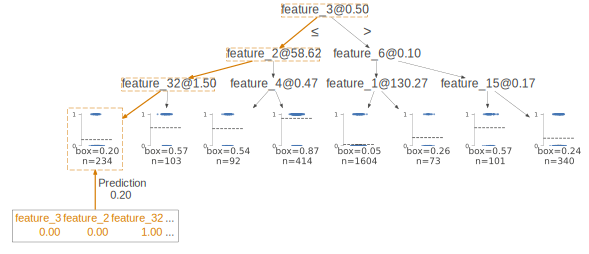

In [11]:
instance_nonfancy_view = viz.view(x=instance, fancy=False);
instance_nonfancy_view

<div class="alert alert-block alert-success">  
<b>Description</b> Same visualization but in non-fancy way (split feature names with split values instead of scatterplot graphs in internal nodes.
</div>

In [12]:
instance_nonfancy_view.save("visualizations/rgr_dtreeviz_instance.svg")

<h3 align="center"> <font color='gray'>Single Instance Path Visualization</font></h3>

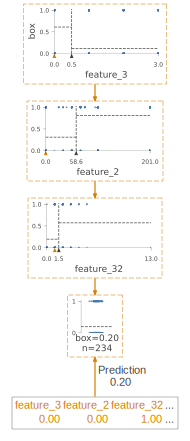

In [13]:
instance_path_view = viz.view(x=instance, show_just_path=True)
instance_path_view

<div class="alert alert-block alert-success">  
<b>Description</b> Visualization showing only the nodes in the path of concerned feature vector x.
</div>

In [14]:
instance_path_view.save("visualizations/rgr_dtreeviz_instance_path.svg")

In [15]:
text_instance_path = viz.explain_prediction_path(instance)
print(text_instance_path)

feature_3 < 0.5
feature_2 < 58.62
feature_32 < 1.5



<div class="alert alert-block alert-success">  
<b>Description</b> Text representation of the instance path visualization preserving split feature name and split value of each node in the of the instance.
</div>

In [16]:
with open("visualizations/rgr_dtreeviz_instance_path.log", "w") as fout:
    fout.write(text_instance_path)

<h3 align="center"> <font color='gray'>Single Instance Feature Importance Visualization</font></h3>

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


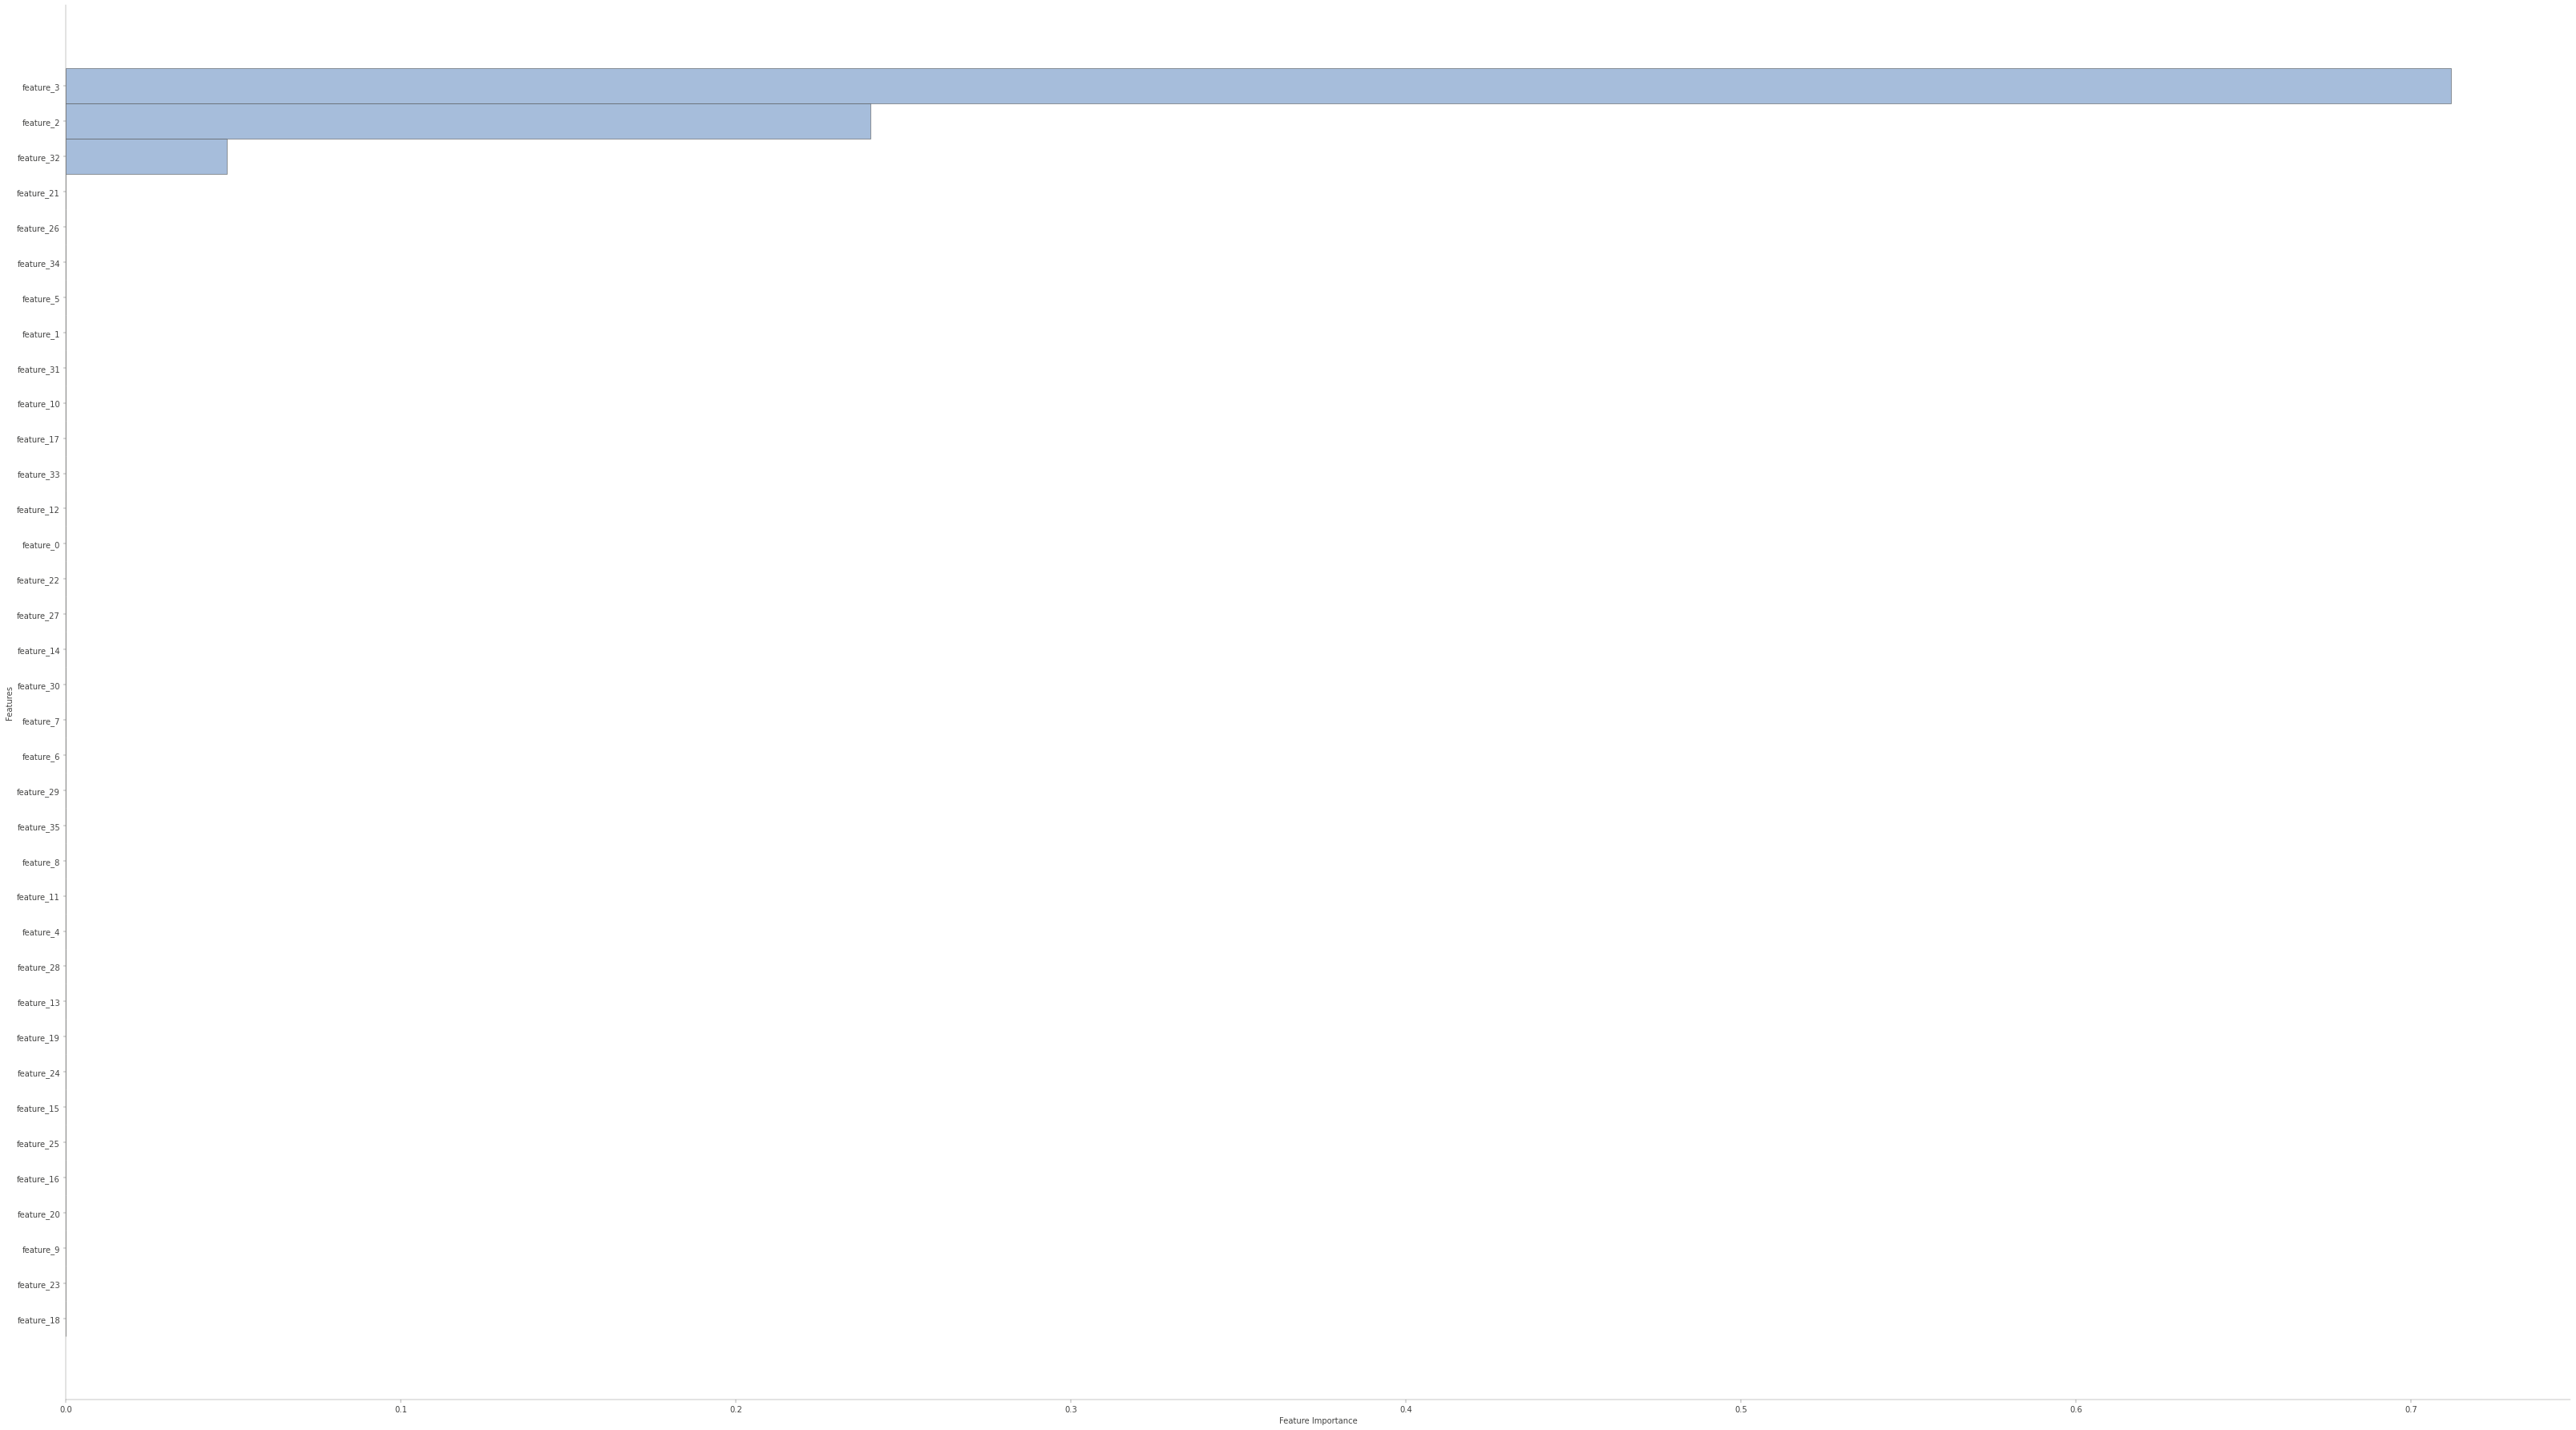

In [17]:
instance_feature_importance_view = viz.instance_feature_importance(x=instance, figsize=(56,32));

<div class="alert alert-block alert-success">  
<b>Description</b> A visualisation for feature importance, just like the popular one from sklearn library,
        but in this scencario, the feature importances will be calculated based only on the nodes from prediction path.   
</div>